In [1]:
!pip install nltk textblob


In [2]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report



In [8]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
data = {
    "tweet": [
        "I love this product!",
        "This is the worst service ever",
        "It is okay, nothing special",
        "Absolutely fantastic experience",
        "I am very disappointed"
    ]
}

df = pd.DataFrame(data)
df


,tweet
0,I love this product!
1,This is the worst service ever
2,"It is okay, nothing special"
3,Absolutely fantastic experience
4,I am very disappointed


In [10]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    return " ".join(tokens)

df['clean_tweet'] = df['tweet'].apply(clean_text)
df


,tweet,clean_tweet
0,I love this product!,love product
1,This is the worst service ever,worst service ever
2,"It is okay, nothing special",okay nothing special
3,Absolutely fantastic experience,absolutely fantastic experience
4,I am very disappointed,disappointed


In [11]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_tweet'].apply(get_sentiment)
df


,tweet,clean_tweet,sentiment
0,I love this product!,love product,Positive
1,This is the worst service ever,worst service ever,Negative
2,"It is okay, nothing special",okay nothing special,Positive
3,Absolutely fantastic experience,absolutely fantastic experience,Positive
4,I am very disappointed,disappointed,Negative


In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['sentiment']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



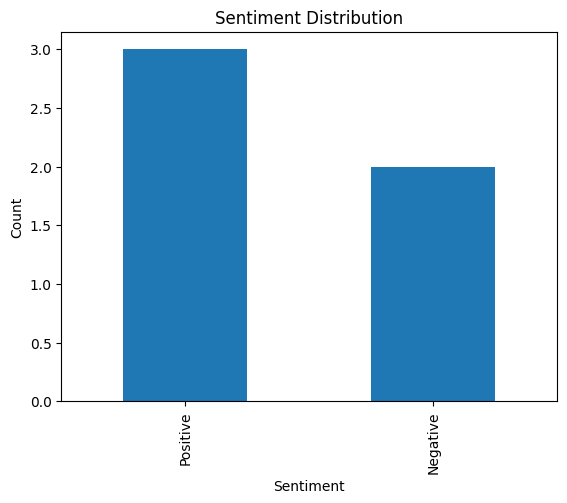

In [16]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
